In [1]:
!pip install openpyxl

In [2]:
import sys
sys.executable

'C:\\Users\\lenovo.DESKTOP-QEQQ361\\AppData\\Local\\Programs\\Python\\Python313\\python.exe'

In [6]:
import sys
sys.executable

'C:\\Users\\lenovo.DESKTOP-QEQQ361\\AppData\\Local\\Programs\\Python\\Python313\\python.exe'

In [7]:
!C:\Users\lenovo.DESKTOP-QEQQ361\AppData\Local\Programs\Python\Python313\python.exe -m pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------

In [8]:
import pandas as pd
df = pd.read_excel("New Year Sales Data.xlsx")
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [10]:
f = df.drop(['Status', 'unnamed1'], axis=1)

In [11]:
df = df.dropna(subset=['Amount'])

In [12]:
df['Amount'] = df['Amount'].astype(int)

In [13]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                  0
Status              11239
unnamed1            11239
dtype: int64

In [14]:
df = df.drop(['Status', 'unnamed1'], axis=1)

In [15]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
for col in df.columns:
    print(col, ":", df[col].nunique())

User_ID : 3752
Cust_name : 1250
Product_ID : 2350
Gender : 2
Age Group : 7
Age : 81
Marital_Status : 2
State : 16
Zone : 5
Occupation : 15
Product_Category : 18
Orders : 4
Amount : 6583


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


C:\Users\lenovo.DESKTOP-QEQQ361\AppData\Local\Temp\ipykernel_21032\4090762078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


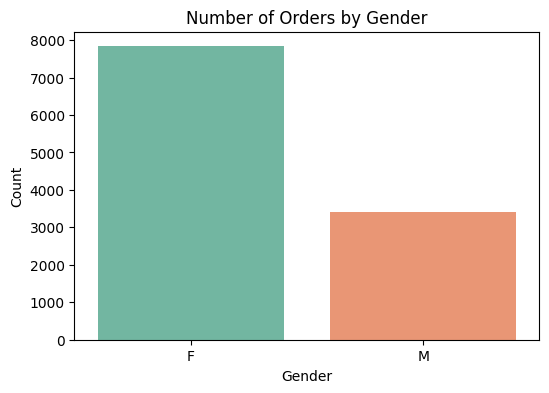

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Number of Orders by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


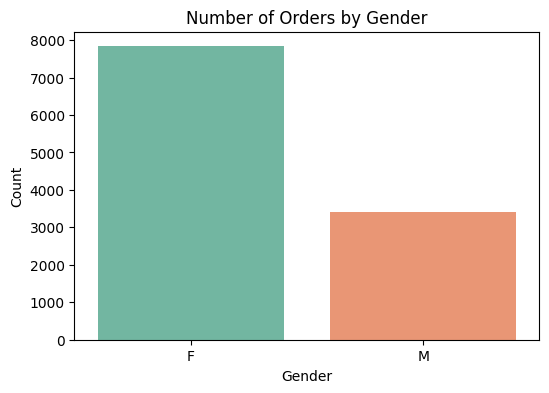

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title("Number of Orders by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


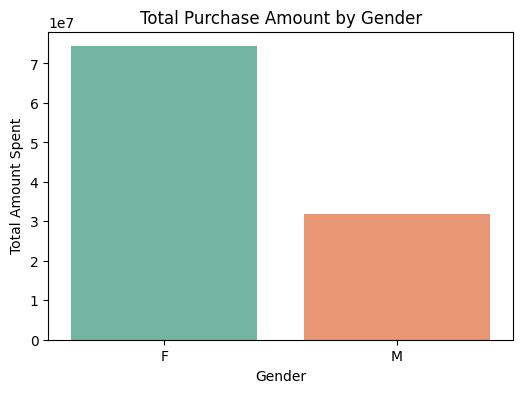

In [22]:
plt.figure(figsize=(6,4))
gender_amount = df.groupby('Gender')['Amount'].sum().reset_index()

sns.barplot(data=gender_amount, x='Gender', y='Amount', hue='Gender', palette='Set2', legend=False)
plt.title("Total Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount Spent")
plt.show()


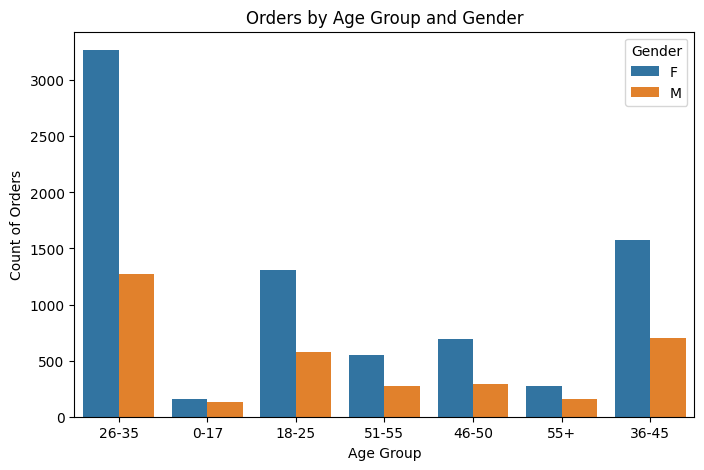

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title("Orders by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Count of Orders")
plt.show()


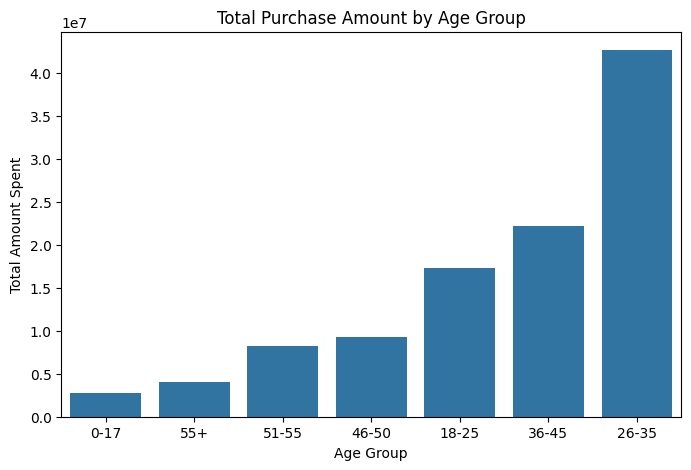

In [24]:
age_amount = df.groupby('Age Group')['Amount'].sum().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=age_amount.index, y=age_amount.values)
plt.title("Total Purchase Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Amount Spent")
plt.show()


In [26]:
# Top 10 states by total purchase amount
top_states_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
top_states_amount


State
Uttar Pradesh       19374968
Maharashtra         14427543
Karnataka           13523540
Delhi               11603818
Madhya Pradesh       8101142
Andhra Pradesh       8037146
Himachal Pradesh     4963368
Haryana              4220175
Bihar                4022757
Gujarat              3946082
Name: Amount, dtype: int64

In [27]:
# Top 10 states by number of orders
top_states_orders = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)
top_states_orders

State
Uttar Pradesh       4807
Maharashtra         3810
Karnataka           3240
Delhi               2740
Madhya Pradesh      2252
Andhra Pradesh      2051
Himachal Pradesh    1568
Kerala              1137
Haryana             1109
Gujarat             1066
Name: Orders, dtype: int64

C:\Users\lenovo.DESKTOP-QEQQ361\AppData\Local\Temp\ipykernel_21032\639189364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states_orders.index, y=top_states_orders.values, palette='viridis')


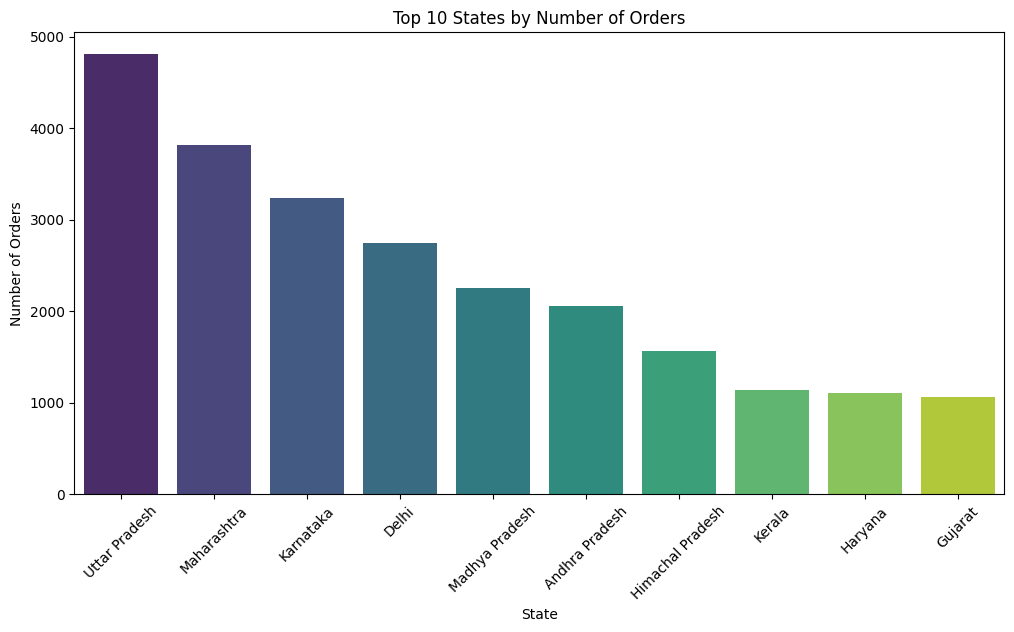

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_states_orders.index, y=top_states_orders.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel("Number of Orders")
plt.title("Top 10 States by Number of Orders")
plt.show()


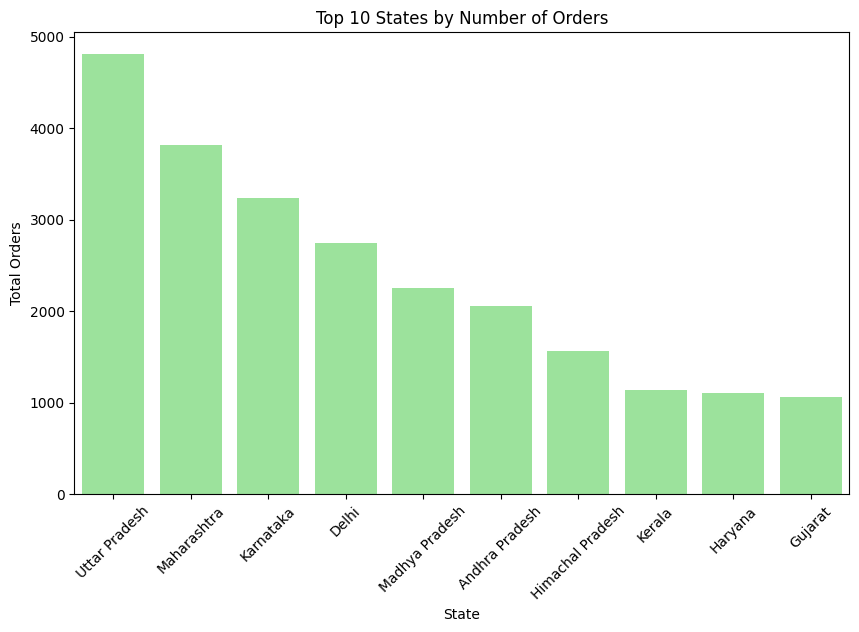

In [32]:
state_orders = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=state_orders.index, y=state_orders.values, color='lightgreen')
plt.title("Top 10 States by Number of Orders")
plt.xlabel("State")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.show()


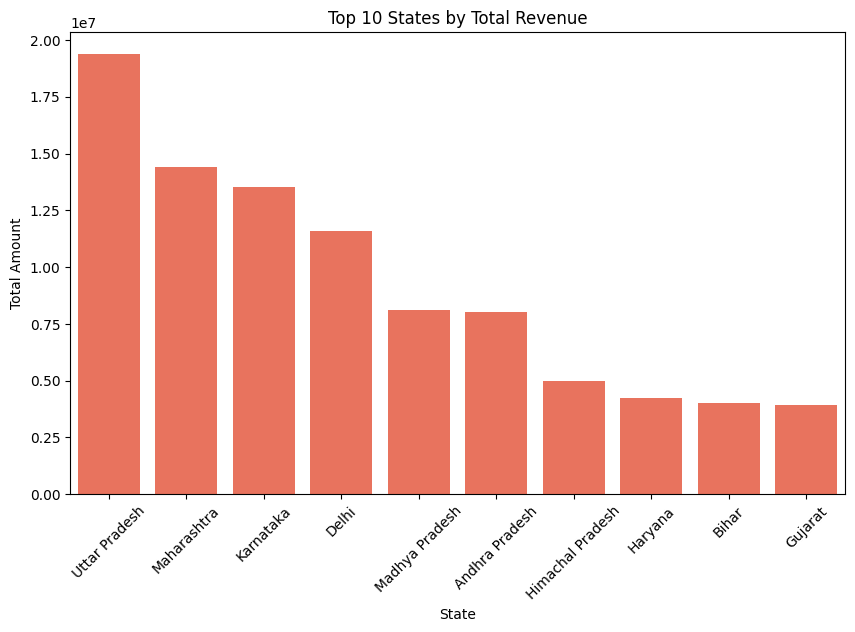

In [33]:
state_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=state_amount.index, y=state_amount.values, color='tomato')
plt.title("Top 10 States by Total Revenue")
plt.xlabel("State")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


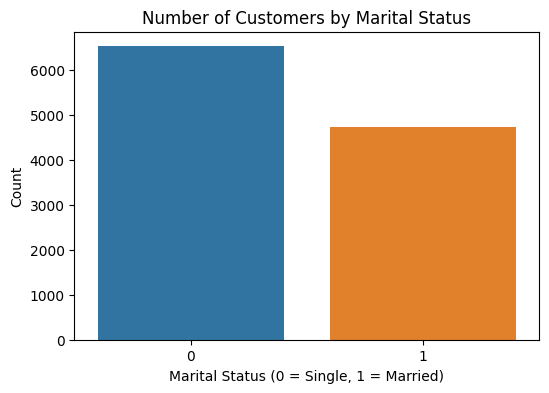

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Marital_Status', hue='Marital_Status', legend=False)  
plt.title("Number of Customers by Marital Status")
plt.xlabel("Marital Status (0 = Single, 1 = Married)")
plt.ylabel("Count")
plt.show()


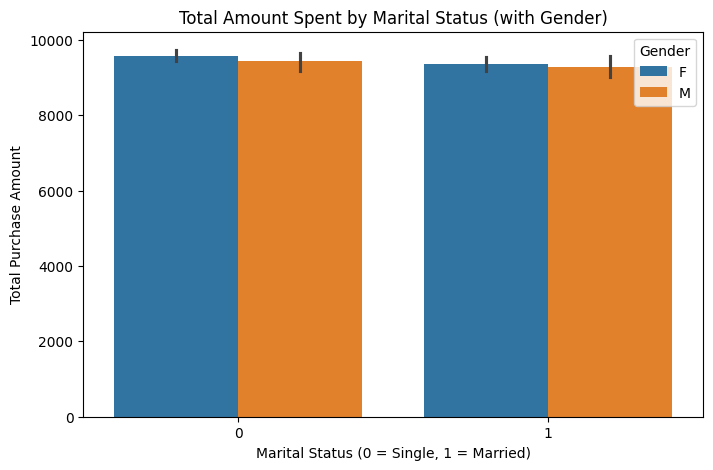

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Marital_Status', y='Amount', hue='Gender')
plt.title("Total Amount Spent by Marital Status (with Gender)")
plt.xlabel("Marital Status (0 = Single, 1 = Married)")
plt.ylabel("Total Purchase Amount")
plt.show()


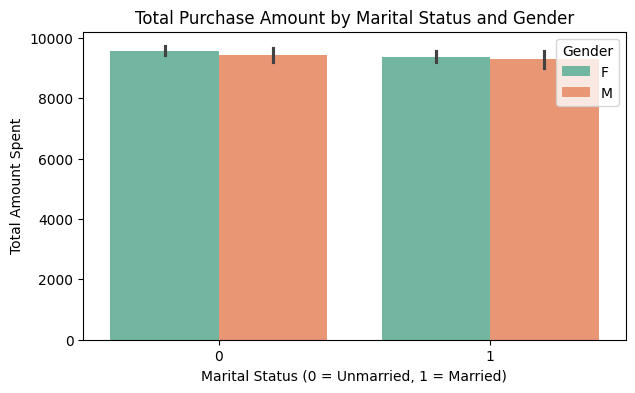

In [36]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='Marital_Status', y='Amount', hue='Gender', palette='Set2')
plt.title("Total Purchase Amount by Marital Status and Gender")
plt.xlabel("Marital Status (0 = Unmarried, 1 = Married)")
plt.ylabel("Total Amount Spent")
plt.show()


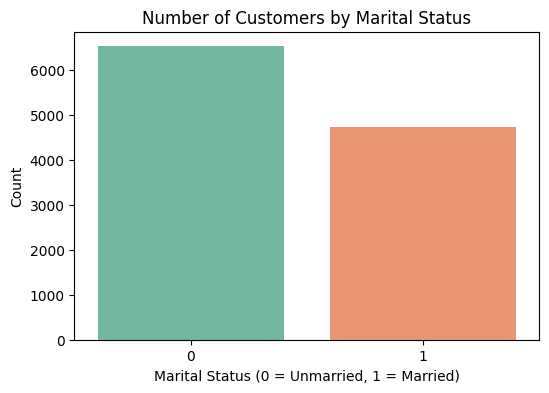

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Marital_Status', hue='Marital_Status', palette='Set2', legend=False)
plt.title("Number of Customers by Marital Status")
plt.xlabel("Marital Status (0 = Unmarried, 1 = Married)")
plt.ylabel("Count")
plt.show()


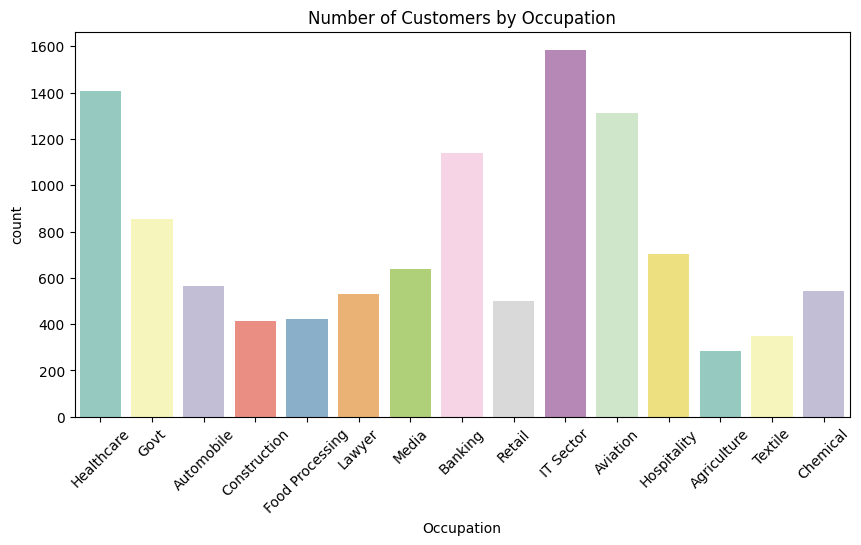

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Occupation', hue='Occupation', palette='Set3', legend=False)
plt.title("Number of Customers by Occupation")
plt.xticks(rotation=45)
plt.show()


C:\Users\lenovo.DESKTOP-QEQQ361\AppData\Local\Temp\ipykernel_21032\995060273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Occupation', y='Amount', palette='Set3', estimator=sum)


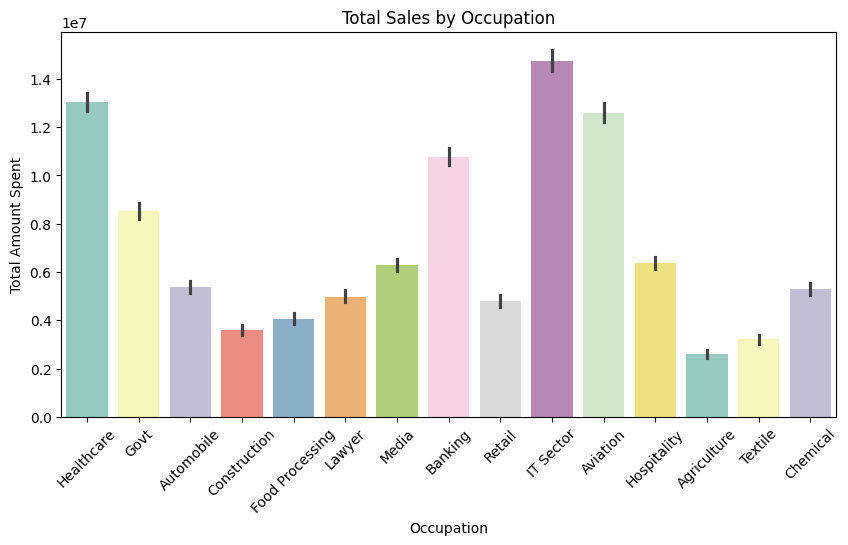

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Occupation', y='Amount', palette='Set3', estimator=sum)
plt.title("Total Sales by Occupation")
plt.xticks(rotation=45)
plt.ylabel("Total Amount Spent")
plt.show()


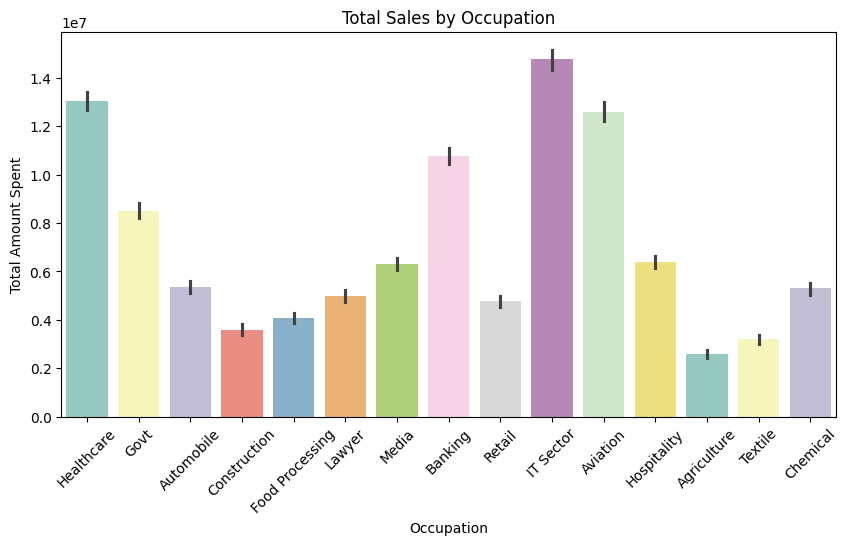

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Occupation', y='Amount', hue='Occupation', palette='Set3', estimator=sum, legend=False)
plt.title("Total Sales by Occupation")
plt.xticks(rotation=45)
plt.ylabel("Total Amount Spent")
plt.show()


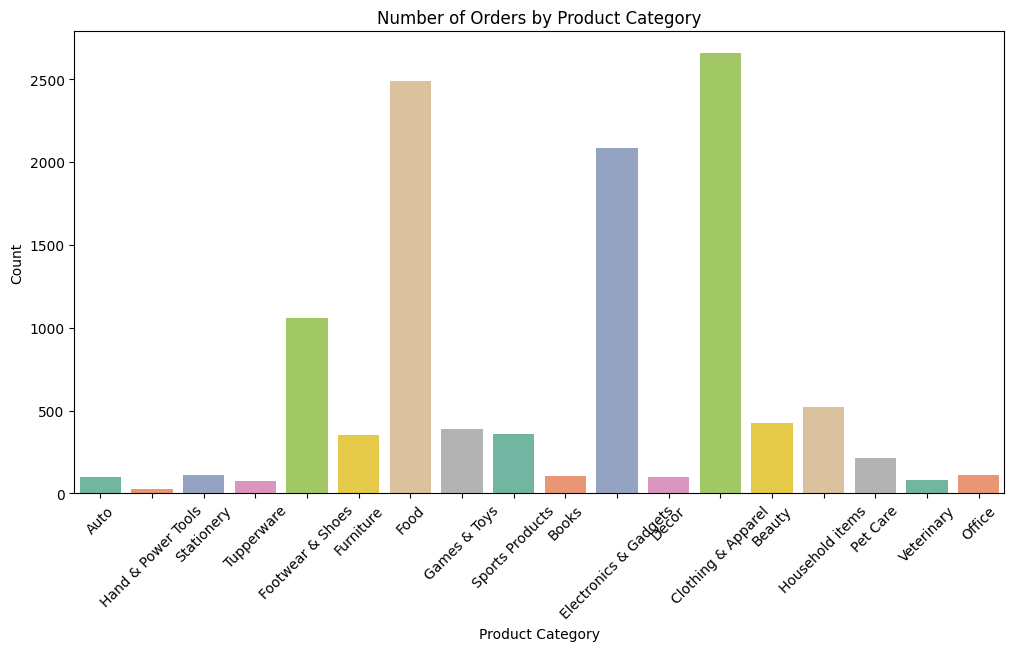

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Product_Category', hue='Product_Category', legend=False, palette='Set2')
plt.title("Number of Orders by Product Category")
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()


In [42]:
top_categories = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10)
top_categories


Product_Category
Food                     33933883
Clothing & Apparel       16495019
Electronics & Gadgets    15643846
Footwear & Shoes         15575209
Furniture                 5440051
Games & Toys              4331694
Sports Products           3635933
Beauty                    1959484
Auto                      1958609
Stationery                1676051
Name: Amount, dtype: int64

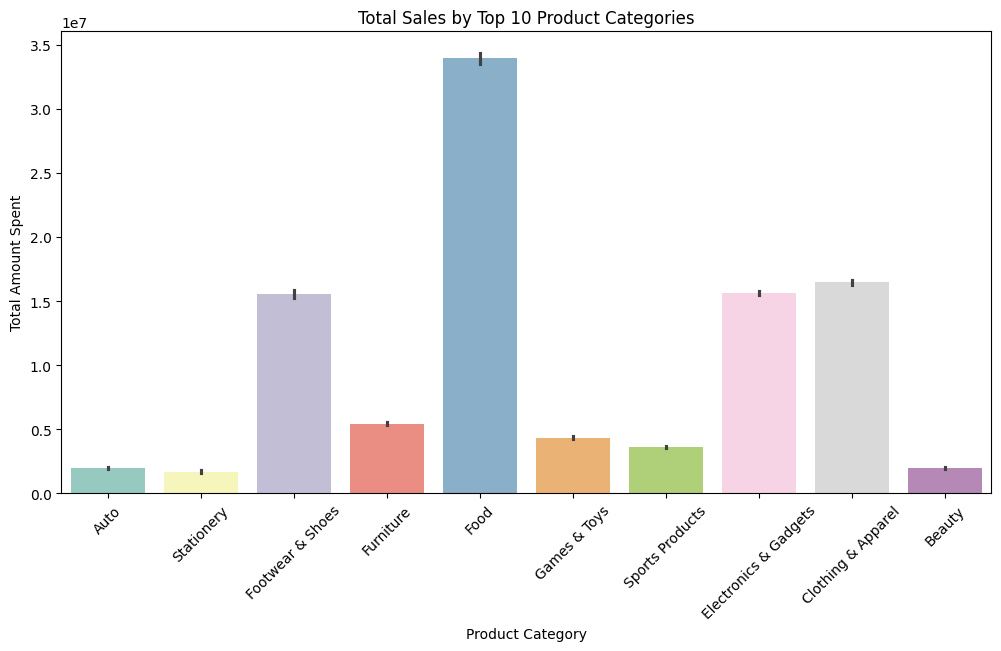

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df[df['Product_Category'].isin(top_categories.index)],
    x='Product_Category',
    y='Amount',
    hue='Product_Category',
    legend=False,
    estimator=sum,
    palette='Set3'
)
plt.title("Total Sales by Top 10 Product Categories")
plt.xticks(rotation=45)
plt.ylabel("Total Amount Spent")
plt.xlabel("Product Category")
plt.show()


In [44]:
df.to_excel("NewYearSales_Cleaned.xlsx", index=False)